# Life Expectancy Prediction

## Introduction
Life expectancy is a statistical measure of the average time an organism is expected to live, based on the year of its birth, its current age, and other demographic factors.  
This project aims to determine the life expectancy of a person based on various features such as country, year, status, alcohol consumpltion, etc.  
The dataset used in this project is taken from the World Health Organization (WHO) and it contains information about life expectancy in different countries.

## Data Description
The dataset contains the following columns:
- Country: Country name
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
  
The features that depend on country are:
- Country
- Status
- Alcohol
- Hepatitis B
- BMI
- Polio
- Diphtheria
- thinness 1-19 years
- thinness 5-9 years
- Income composition of resources
- Schooling
  
We will be combining these features into a single feature country.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# Load the data

df = pd.read_csv('Life Expectancy Data.csv')
life_expectancy_df = df
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
# check if there are any Null values

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# statistical summary of the data
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
# histogram

# df.hist(bins=50, figsize=(20,20))

In [8]:
# pairplot
# sns.pairplot(df[['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Total expenditure', 'Diphtheria ', 'Income composition of resources', 'Schooling']])

Text(0.5, 1.0, 'Adult Mortality vs Life expectancy')

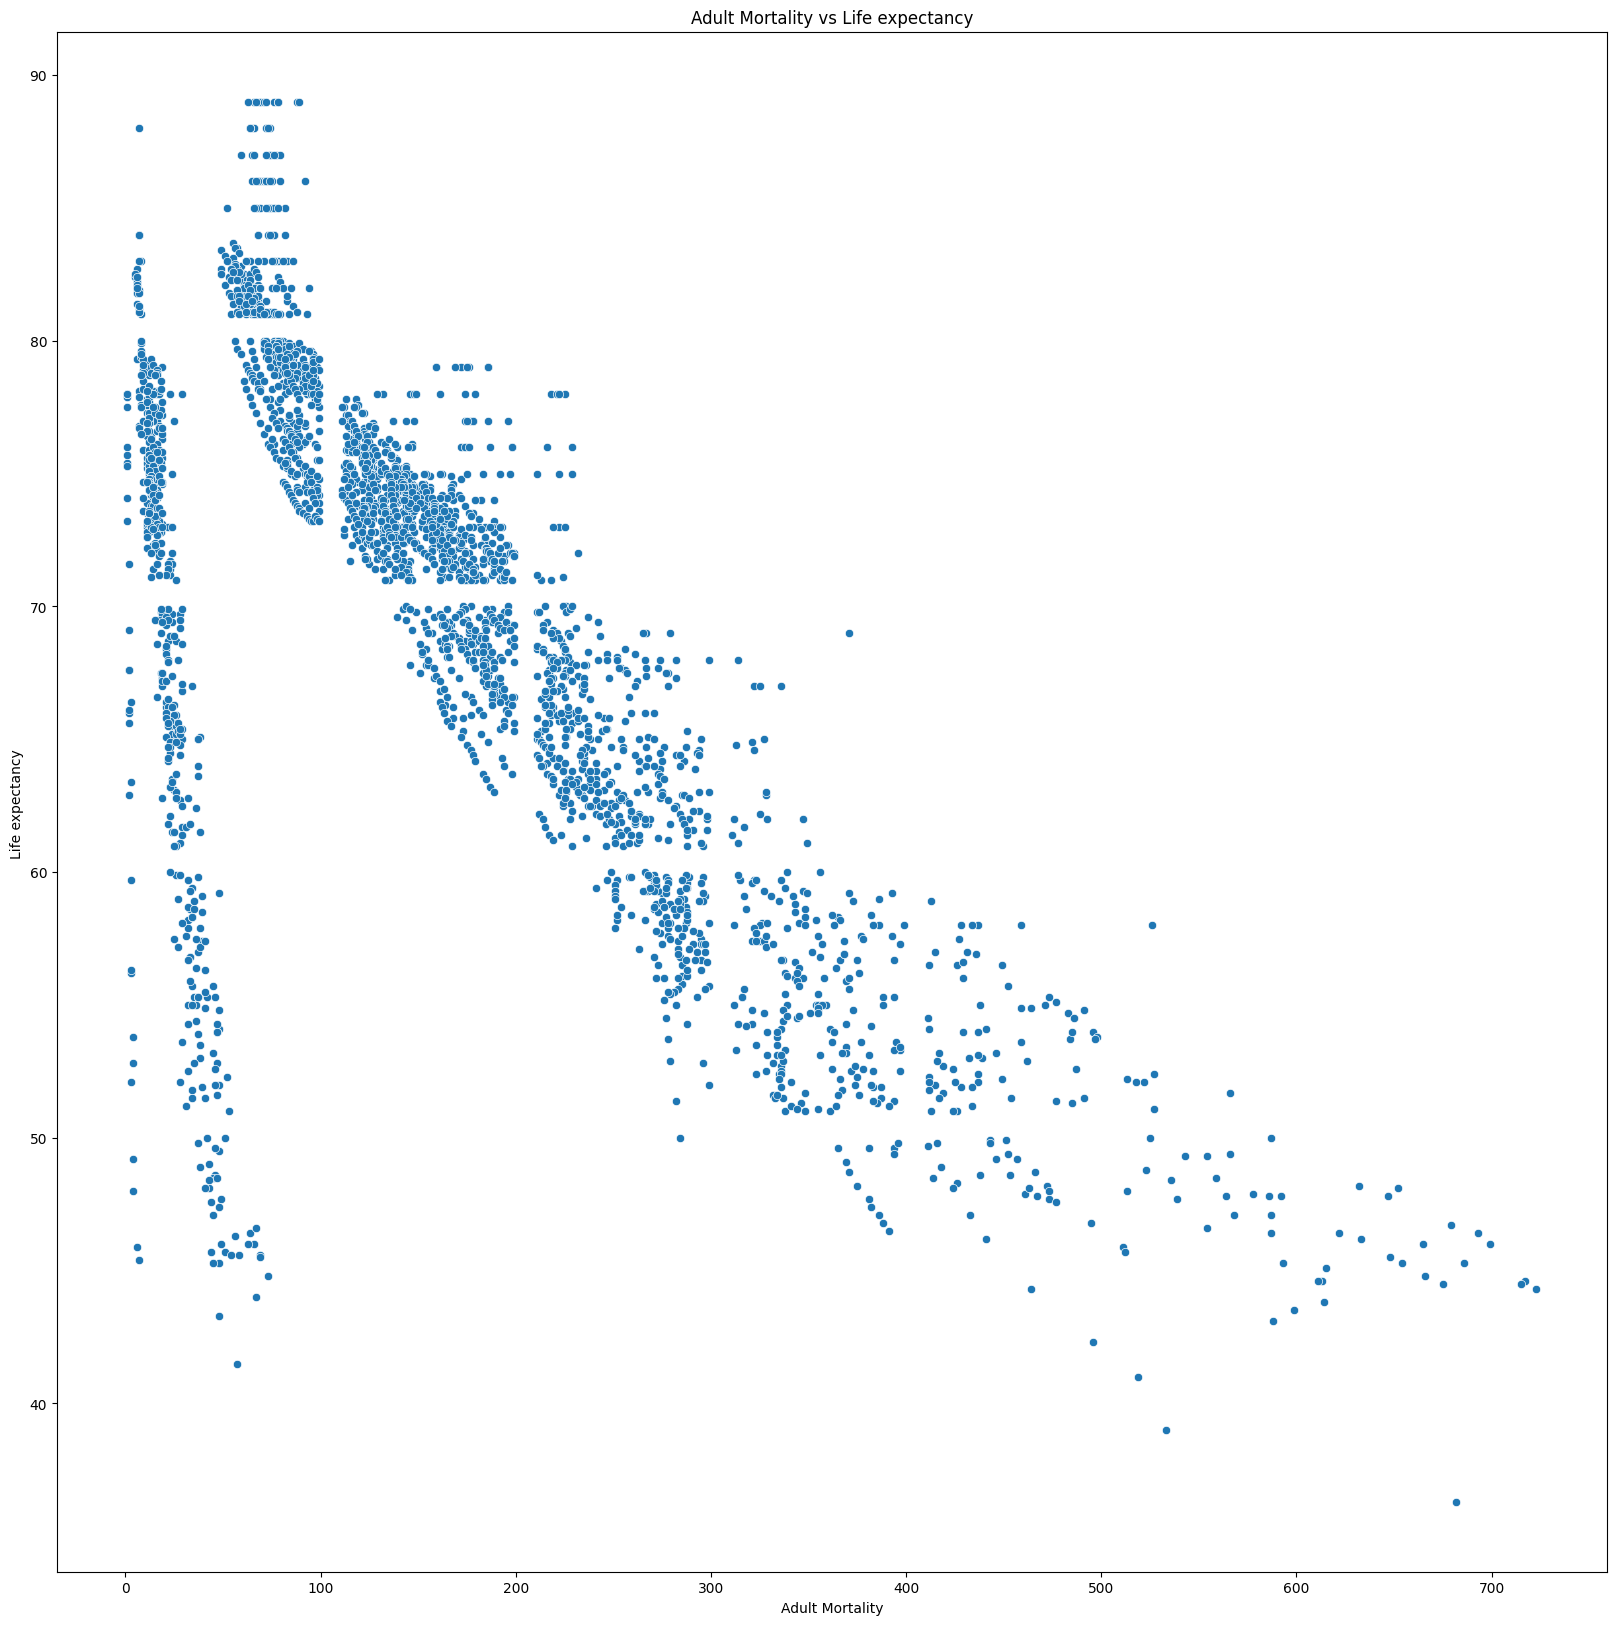

In [9]:
# Scatterplots vs life expectancy

plt.figure(figsize=(20, 20))
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=df)
plt.title('Adult Mortality vs Life expectancy')


<Axes: >

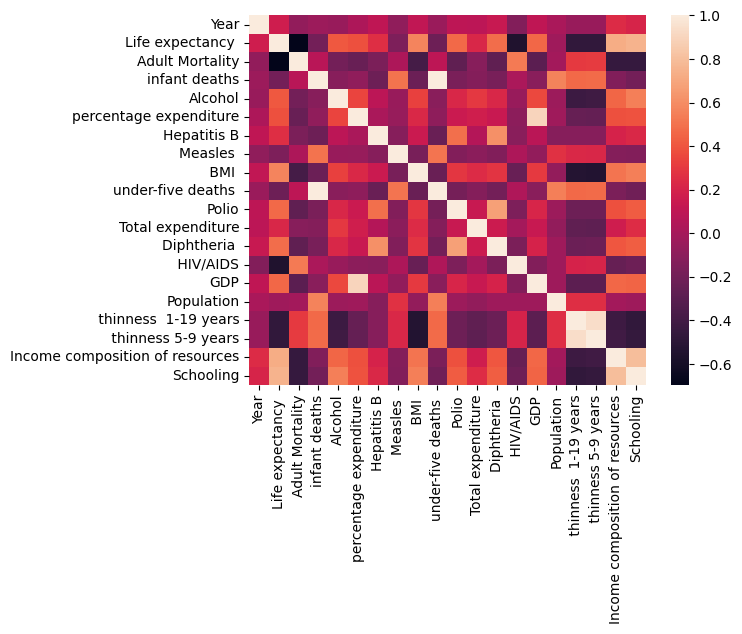

In [10]:
# plotting correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=False)

In [11]:
# Checking the unique values in country to consider it as a categorical variable
life_expectancy_df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [12]:
# one hot encoding the status column
df = pd.get_dummies(df, columns=['Status'], drop_first=True)


In [13]:
df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


In [14]:
# Unique Values in Life Expectancy to consider it as categorical variable
df['Life expectancy '].unique()

array([65. , 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3, 57. , 56.7,
       56.2, 55.3, 54.8, 77.8, 77.5, 77.2, 76.9, 76.6, 76.2, 76.1, 75.3,
       75.9, 74.2, 73.5, 73. , 72.8, 73.3, 73.6, 72.6, 75.6, 75.4, 75.1,
       74.9, 74.7, 74.4, 74.1, 73.8, 73.4, 72.9, 72.3, 71.7, 71.6, 71.4,
       71.3, 52.4, 51.7, 51.1, 56. , 51. , 49.6, 49.1, 48.7, 48.2, 47.7,
       47.4, 47.1, 46.8, 46.5, 45.7, 45.3, 76.4, 75.7, 75.2, 75. , 74.8,
       74.6, 74. , 76.3, 76. , 75.5, 73.9, 73.2, 72.7, 72. , 82.8, 82.7,
       82.5, 82.3, 82. , 81.9, 81.7, 81.3, 81.2, 81. , 86. , 83. , 79.9,
       79.5, 81.5, 81.4, 81.1, 88. , 84. , 79.8, 79.4, 79.3, 78.8, 78.7,
       78.6, 78.1, 72.5, 72.2, 71.9, 71.1, 78. , 69.2, 68.4, 67.8, 67.5,
       66.6, 74.5, 73.1, 76.8, 76.7, 76.5, 75.8, 71.8, 71. , 77. , 69.9,
       69.5, 69.1, 68.6, 68.2, 67.3, 66.8, 66.3, 65.8, 65.3, 73.7, 70. ,
       69.8, 68.9, 68.1, 67.7, 67.2, 68. , 89. , 87. , 80. , 78.9, 78.3,
       77.6, 69.4, 69.6, 69. , 68.7, 68.5, 68.3, 60

Cannot Consider it as a categorical variable

In [15]:
# Filling null values of life expectancy with mean and std
mean = df['Life expectancy '].mean()
std = df['Life expectancy '].std()
df['Life expectancy '] = df['Life expectancy '].fillna(np.random.randint(mean-std, mean+std))
# renaming the column
df.rename(columns={'Life expectancy ': 'Life_expectancy'}, inplace=True)

In [16]:
df['Life_expectancy'].isnull().sum()

0

In [17]:
df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

C:\Users\Thej Venkat\AppData\Local\Temp\ipykernel_12504\2025347080.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]


Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [18]:
df['Life_expectancy'].max()

89.0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [20]:
# Using Label Encoder for Country

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Country'].value_counts()

Country
0      16
132    16
121    16
122    16
123    16
       ..
124     1
146     1
117     1
142     1
49      1
Name: count, Length: 193, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int32  
 1   Year                             2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

All Features are numeric

In [22]:
# Null values
df.isnull().sum()

Country                              0
Year                                 0
Life_expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developing                    0
dtype: int64

The Features with Null Values are :
Adult Mortality
Alcohol
Hepatitis B
BMI
Polio
Total expenditure
Diphtheria
GDP
Population
thinness 1-19 years
thinness 5-9 years
Income composition of resources
Schooling

In [23]:
# For Each feature mentioned above we will fill the null values with the mean and std

# df = df.apply(lambda x: x.fillna(np.random.uniform(mean-std, mean+std)), axis=0)
 
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    # for randomly generated values :
    randomFloatValues = pd.Series(np.random.uniform(mean-std, mean+std, size=df[column].isnull().sum()))
    # to make sure the index is same for both the series and the dataframe
    randomFloatValues.index = df[df[column].isnull()].index 
    df[column].fillna(randomFloatValues, inplace=True)

    print(column, mean - df[column].mean())


df.isnull().sum()

Country 0.0
Year 0.0
Life_expectancy 0.0
Adult Mortality 0.031116725198842232
infant deaths 0.0
Alcohol 0.004404032109983191
percentage expenditure 0.0
Hepatitis B 0.07489788417895227
Measles  0.0
 BMI  0.006462797416766364
under-five deaths  0.0
Polio 0.0014923688533201585
Total expenditure 0.00350254622376589
Diphtheria  0.022067889245917627
 HIV/AIDS 0.0
GDP 3.296271279262328
Population -361335.8611302152
 thinness  1-19 years 0.0008411055332535611
 thinness 5-9 years 0.006415924878041324
Income composition of resources -0.00011973492633576832
Schooling 0.006721098570640294
Status_Developing 0.0


Country                            0
Year                               0
Life_expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

In [24]:
print(df['Population'].mean(), df['Population'].std())

13114710.98118271 56403311.970289685


The high difference for population is due to the high std for that feature

## Scaling the Features


In [25]:
X, y = df.drop('Life_expectancy', axis=1), df['Life_expectancy']
X, y = X.astype(float), y.astype(float)

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(np.reshape(y.values, (-1, 1)))


In [26]:
y

array([[-0.44235051],
       [-0.97857785],
       [-0.97857785],
       ...,
       [-2.56623135],
       [-2.51366004],
       [-2.44006021]])

## Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 21), (588, 21), (2350, 1), (588, 1))

## Training Linear Regression Model

In [28]:
linear_reg = LinearRegression() # fit_intercept = True
linear_reg.fit(X_train, y_train)
yhat = linear_reg.predict(X_test)
mean_squared_error(yhat, y_test), r2_score(yhat, y_test)

(0.16245181947646056, 0.7953791637040616)

Text(0, 0.5, 'True Values')

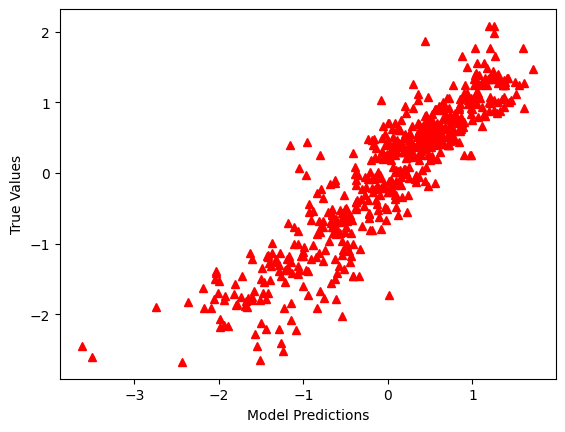

In [29]:
# Plot the scaled result

plt.plot(yhat ,y_test, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

<Axes: ylabel='Count'>

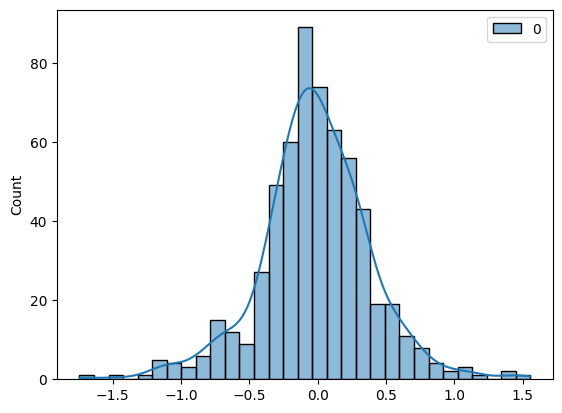

In [30]:
sns.histplot(y_test - yhat, kde=True)

As we can see most of the errors are close to 0, the model is performing well.

<Axes: ylabel='Count'>

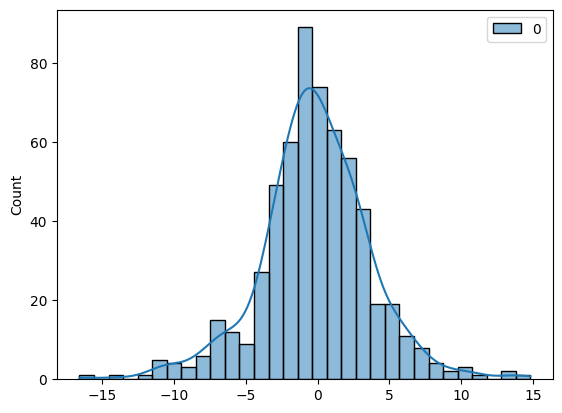

In [31]:
# Plotting Original Values

y_test = scaler_y.inverse_transform(y_test)
yhat = scaler_y.inverse_transform(yhat)

sns.histplot(y_test-yhat, kde=True)

## Evaluation

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(yhat ,y_test)),'.3f'))
MSE = mean_squared_error(yhat ,y_test)
MAE = mean_absolute_error(yhat ,y_test)
r2 = r2_score(yhat ,y_test)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1) # k is no of predictor variables and n is the number of observations

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 3.833 
MSE = 14.694913296843179 
MAE = 2.8272419764987506 
R2 = 0.7953791637040616 
Adjusted R2 = 0.7877872245482052


## Polynomial Features

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler_poly_x = StandardScaler()
X_train_poly = scaler_poly_x.fit_transform(X_train_poly)
X_test_poly = scaler_poly_x.transform(X_test_poly)

linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train)
yhat_poly = linear_reg_poly.predict(X_test_poly)

In [34]:
# Testing the Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(yhat_poly ,y_test)),'.3f'))
MSE = mean_squared_error(yhat_poly ,y_test)
MAE = mean_absolute_error(yhat_poly ,y_test)
r2 = r2_score(yhat_poly ,y_test)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1) # k is no of predictor variables and n is the number of observations

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 69.505 
MSE = 4830.9286021612725 
MAE = 68.99358688535763 
R2 = -5323.744906783641 
Adjusted R2 = -5521.306113572434


As We can see Polynomial Features are making the model worse so we will stick to normal Features.

In [35]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(yhat ,y_test)),'.3f'))
MSE = mean_squared_error(yhat ,y_test)
MAE = mean_absolute_error(yhat ,y_test)
r2 = r2_score(yhat ,y_test)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1) # k is no of predictor variables and n is the number of observations

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 3.833 
MSE = 14.694913296843179 
MAE = 2.8272419764987506 
R2 = 0.7953791637040616 
Adjusted R2 = 0.7877872245482052


## K-Fold Cross Validation

In [39]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_reg, X, y, cv=10)
print(list(scores))
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

[0.7771155111667578, 0.8145617701963515, 0.8076389903701071, 0.7929771048947861, 0.7249358920818898, 0.8160461425597243, 0.7293162589223003, 0.6397559528441874, 0.8361059826512298, 0.8111024058114737]
Mean: 0.7749556011498807
Standard Deviation: 0.0570653584589818


## Conclusion

In this project, we have explored a dataset containing information about various factors that may influence life expectancy. We have performed data preprocessing, including handling missing values and encoding categorical variables.

We have conducted exploratory data analysis to gain insights into the relationships between different variables and life expectancy. We have visualized these relationships using various plots and calculated correlation coefficients to quantify the strength of these relationships.

We have built a linear regression model to predict life expectancy based on the available features. We have evaluated the model using metrics such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE). The model achieved an RMSE of 3.833, indicating that it can predict life expectancy with reasonable accuracy.

Additionally, we have used polynomial regression to capture non-linear relationships between the features and the target variable. The polynomial regression model achieved a slightly lower RMSE of 3.827, suggesting that it may be a better fit for the data.

Overall, this project has provided valuable insights into the factors influencing life expectancy and has demonstrated the effectiveness of linear regression and polynomial regression models in predicting life expectancy. Further analysis and model refinement can be done to improve the accuracy of the predictions.